In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

from sklearn.linear_model import LogisticRegression as sklearn_LogisticRegression

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('data_banknote_authentication.txt', header=None)
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df = df.astype({'class': 'category'})

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df['class'].value_counts()

In [ ]:
def adaboost_loss(y_true, y_pred):
    y_true = y_true * 2 - 1
    y_pred = y_pred * 2 - 1

    return tf.reduce_mean(tf.exp(-y_true * y_pred))


def bernoulli_loss(y_true, y_pred):
    y_true = y_true * 2 - 1
    y_pred = y_pred * 2 - 1

    return tf.reduce_mean(tf.math.log(1 + tf.exp(-y_true * y_pred)))

In [ ]:
class LogisticRegression(Model):
    def __init__(self):
        super().__init__()
        self.d1 = Dense(units=1,
                        activation='sigmoid',
                        use_bias=True)

    def call(self, x):
        return self.d1(x)

In [ ]:
# train, test = train_test_split(df, test_size=0.2, random_state=42)
train = df.sample(frac=1, random_state=42)

In [ ]:
m1 = LogisticRegression()
m1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])
hist1 = m1.fit(train[['variance', 'skewness', 'curtosis', 'entropy']], tf.cast(train['class'], tf.float32), epochs=200,
                 validation_split=0.2, verbose=2)

35/35 - 0s - loss: 0.7022 - binary_accuracy: 0.6135 - val_loss: 0.7207 - val_binary_accuracy: 0.5855 - 69ms/epoch - 2ms/step
Epoch 32/200
35/35 - 0s - loss: 0.6714 - binary_accuracy: 0.6354 - val_loss: 0.6893 - val_binary_accuracy: 0.6073 - 80ms/epoch - 2ms/step
Epoch 33/200
35/35 - 0s - loss: 0.6433 - binary_accuracy: 0.6591 - val_loss: 0.6604 - val_binary_accuracy: 0.6327 - 89ms/epoch - 3ms/step
Epoch 34/200
35/35 - 0s - loss: 0.6171 - binary_accuracy: 0.6837 - val_loss: 0.6331 - val_binary_accuracy: 0.6582 - 78ms/epoch - 2ms/step
Epoch 35/200
35/35 - 0s - loss: 0.5925 - binary_accuracy: 0.7028 - val_loss: 0.6075 - val_binary_accuracy: 0.6873 - 77ms/epoch - 2ms/step
Epoch 36/200
35/35 - 0s - loss: 0.5701 - binary_accuracy: 0.7174 - val_loss: 0.5841 - val_binary_accuracy: 0.7018 - 80ms/epoch - 2ms/step
Epoch 37/200
35/35 - 0s - loss: 0.5493 - binary_accuracy: 0.7366 - val_loss: 0.5627 - val_binary_accuracy: 0.7273 - 77ms/epoch - 2ms/step
Epoch 38/200
35/35 - 0s - loss: 0.5299 - binary

In [ ]:
m2 = LogisticRegression()
m2.compile(optimizer='adam',
                 loss=adaboost_loss,
                 metrics=['binary_accuracy'])
hist2 = m2.fit(train[['variance', 'skewness', 'curtosis', 'entropy']], tf.cast(train['class'], tf.float32), epochs=200,
                 validation_split=0.2, verbose=2)

Epoch 1/200
35/35 - 1s - loss: 1.3725 - binary_accuracy: 0.5096 - val_loss: 1.4266 - val_binary_accuracy: 0.4764 - 772ms/epoch - 22ms/step
Epoch 2/200
35/35 - 0s - loss: 1.3566 - binary_accuracy: 0.5150 - val_loss: 1.4096 - val_binary_accuracy: 0.4909 - 85ms/epoch - 2ms/step
Epoch 3/200
35/35 - 0s - loss: 1.3401 - binary_accuracy: 0.5196 - val_loss: 1.3916 - val_binary_accuracy: 0.4945 - 83ms/epoch - 2ms/step
Epoch 4/200
35/35 - 0s - loss: 1.3231 - binary_accuracy: 0.5223 - val_loss: 1.3719 - val_binary_accuracy: 0.5018 - 89ms/epoch - 3ms/step
Epoch 5/200
35/35 - 0s - loss: 1.3049 - binary_accuracy: 0.5251 - val_loss: 1.3521 - val_binary_accuracy: 0.5055 - 90ms/epoch - 3ms/step
Epoch 6/200
35/35 - 0s - loss: 1.2863 - binary_accuracy: 0.5378 - val_loss: 1.3315 - val_binary_accuracy: 0.5055 - 157ms/epoch - 4ms/step
Epoch 7/200
35/35 - 0s - loss: 1.2664 - binary_accuracy: 0.5406 - val_loss: 1.3087 - val_binary_accuracy: 0.5236 - 94ms/epoch - 3ms/step
Epoch 8/200
35/35 - 0s - loss: 1.2454 

In [ ]:
m3 = LogisticRegression()
m3.compile(optimizer='adam',
                 loss=bernoulli_loss,
                 metrics=['binary_accuracy'])
hist3 = m3.fit(train[['variance', 'skewness', 'curtosis', 'entropy']], tf.cast(train['class'], tf.float32), epochs=200,
                 validation_split=0.2, verbose=2)

Epoch 1/200
35/35 - 1s - loss: 0.4562 - binary_accuracy: 0.8560 - val_loss: 0.4462 - val_binary_accuracy: 0.8764 - 523ms/epoch - 15ms/step
Epoch 2/200
35/35 - 0s - loss: 0.4409 - binary_accuracy: 0.8861 - val_loss: 0.4326 - val_binary_accuracy: 0.8945 - 76ms/epoch - 2ms/step
Epoch 3/200
35/35 - 0s - loss: 0.4294 - binary_accuracy: 0.9025 - val_loss: 0.4216 - val_binary_accuracy: 0.9127 - 72ms/epoch - 2ms/step
Epoch 4/200
35/35 - 0s - loss: 0.4208 - binary_accuracy: 0.9170 - val_loss: 0.4127 - val_binary_accuracy: 0.9309 - 72ms/epoch - 2ms/step
Epoch 5/200
35/35 - 0s - loss: 0.4139 - binary_accuracy: 0.9253 - val_loss: 0.4054 - val_binary_accuracy: 0.9418 - 70ms/epoch - 2ms/step
Epoch 6/200
35/35 - 0s - loss: 0.4084 - binary_accuracy: 0.9298 - val_loss: 0.3996 - val_binary_accuracy: 0.9564 - 71ms/epoch - 2ms/step
Epoch 7/200
35/35 - 0s - loss: 0.4039 - binary_accuracy: 0.9335 - val_loss: 0.3947 - val_binary_accuracy: 0.9564 - 70ms/epoch - 2ms/step
Epoch 8/200
35/35 - 0s - loss: 0.4001 -

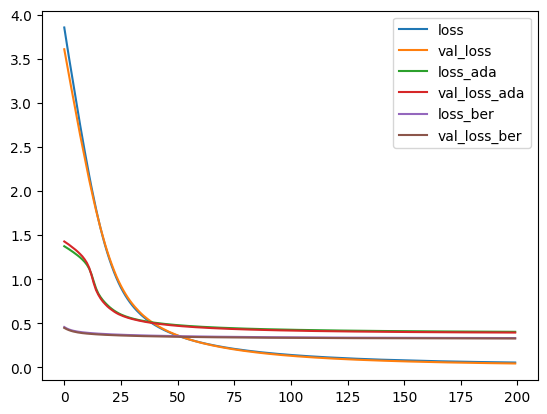

In [ ]:
plt.plot(hist1.history['loss'], label='loss')
plt.plot(hist1.history['val_loss'], label='val_loss')

plt.plot(hist2.history['loss'], label='loss_ada')
plt.plot(hist2.history['val_loss'], label='val_loss_ada')

plt.plot(hist3.history['loss'], label='loss_ber')
plt.plot(hist3.history['val_loss'], label='val_loss_ber')

plt.legend()

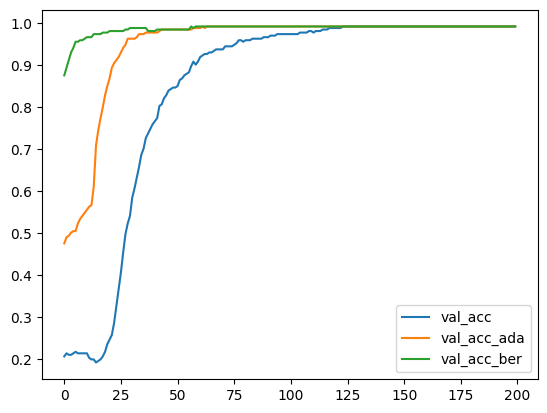

In [ ]:
# plt.plot(hist1.history['binary_accuracy'], label='acc')
plt.plot(hist1.history['val_binary_accuracy'], label='val_acc')

# plt.plot(hist2.history['binary_accuracy'], label='acc_ada')
plt.plot(hist2.history['val_binary_accuracy'], label='val_acc_ada')

plt.plot(hist3.history['val_binary_accuracy'], label='val_acc_ber')

plt.legend()

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [206]:
m4 = sklearn_LogisticRegression().fit(train[['variance', 'skewness', 'curtosis', 'entropy']], train['class'])

In [207]:
m4.score(train[['variance', 'skewness', 'curtosis', 'entropy']], train['class'])

0.99179580674567

In [208]:
acc = m4.score(test[['variance', 'skewness', 'curtosis', 'entropy']], test['class'])
acc

0.9854545454545455

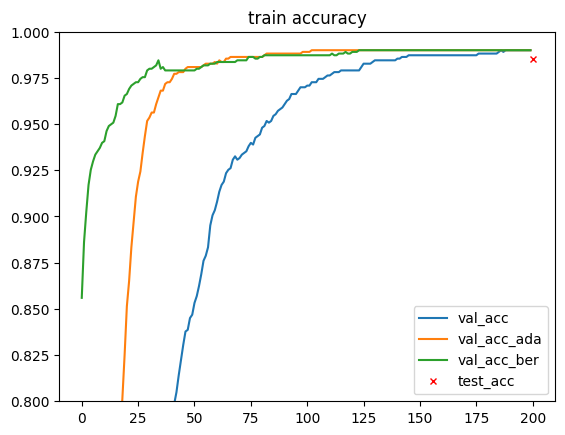

In [209]:
plt.plot(hist1.history['binary_accuracy'], label='val_acc')

plt.plot(hist2.history['binary_accuracy'], label='val_acc_ada')

plt.plot(hist3.history['binary_accuracy'], label='val_acc_ber')

plt.plot(len(hist1.history['val_binary_accuracy']), acc, 'rx', markersize=5, label='test_acc')

plt.legend()
plt.ylim(0.8, 1.0);
plt.title('train accuracy');

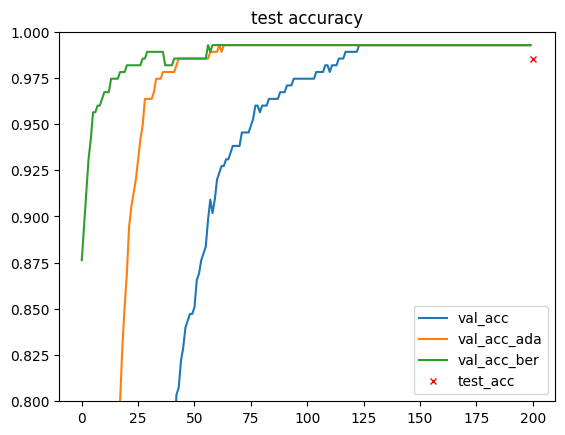

In [210]:
plt.plot(hist1.history['val_binary_accuracy'], label='val_acc')

plt.plot(hist2.history['val_binary_accuracy'], label='val_acc_ada')

plt.plot(hist3.history['val_binary_accuracy'], label='val_acc_ber')

plt.plot(len(hist1.history['val_binary_accuracy']), acc, 'rx', markersize=5, label='test_acc')

plt.legend()
plt.ylim(0.8, 1.0);
plt.title('test accuracy');